In [1]:
import pandas as pd
from sklearn import linear_model, tree, neural_network, preprocessing
import numpy as np
import random
import os
import copy
import math
from matplotlib import pyplot as plt
from datetime import datetime
from itertools import combinations

#remove columns with a lot of missing values
com_data = pd.read_table('../datasets/communities.data', header=None, delimiter=',')
column_names = pd.read_table('../datasets/communities.names', header=None, delimiter=',')
c = column_names.to_numpy().flatten()
com_data.columns = c

cols = [126, 124, 123, 122, 121, 1, 2, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101]
print(len(cols))
com_data.drop(com_data.columns[cols], axis=1, inplace=True)
com_data.drop([130], inplace=True)

#transfrom categorical variable into numerical
ord_enc = preprocessing.OrdinalEncoder()
com_data[com_data.columns[1]] = ord_enc.fit_transform(com_data[[com_data.columns[1]]])
# print(com_data.columns[103])
i = list(com_data.columns)
i.insert(0, i.pop(i.index('racepctblack')))
i.insert(0, i.pop(i.index('medIncome')))
i.insert(0, i.pop(i.index('PctPopUnderPov')))
i.insert(0, i.pop(i.index('ViolentCrimesPerPop')))
com_data = com_data[i]
com_data.describe(include='all')  
com_data.to_csv('com_processed_data.csv')
npdata = com_data.to_numpy()


24


In [2]:
table = np.random.randint(1,20, (5,7))
table = table / 20
# print(table.to_csv)
print(table)
noises = np.random.normal(0, 0.1, 5)
table[:, 5] = table[:, 5] + noises
print(table)

[[0.3  0.95 0.15 0.2  0.85 0.55 0.9 ]
 [0.95 0.6  0.8  0.2  0.35 0.85 0.2 ]
 [0.65 0.35 0.7  0.05 0.35 0.8  0.25]
 [0.3  0.35 0.45 0.45 0.9  0.25 0.75]
 [0.6  0.2  0.3  0.3  0.75 0.7  0.7 ]]
[[0.3        0.95       0.15       0.2        0.85       0.43942109
  0.9       ]
 [0.95       0.6        0.8        0.2        0.35       1.0187848
  0.2       ]
 [0.65       0.35       0.7        0.05       0.35       0.84776711
  0.25      ]
 [0.3        0.35       0.45       0.45       0.9        0.24777743
  0.75      ]
 [0.6        0.2        0.3        0.3        0.75       0.57255809
  0.7       ]]


In [3]:
#define the test indices and define the test data. This data remains untouched
random.seed(50)
test_indices = np.unique(np.array([random.randint(0,npdata.shape[0]-1) for k in range(0,math.ceil(0.2*npdata.shape[0]))]))
# print(test_indices)
test_data = npdata[test_indices, :]
test_X = test_data[:,1:]
real_mpg = test_data[:, 0]

#set up iteration variables and parameters
mu = 0
# displacement = 1st column, hp = 2nd column, weight = 3rd column, acceleration = 4th column
features = [[0], [1], [2], [0,1], [0,2], [1,2], [0,1,2]] 
percentages = np.arange(0, 0.1, 0.01)
iterations = 50


#set up arrays for the results of the models
results = np.zeros([iterations, test_X.shape[0]])
output_variances = np.zeros(percentages.size)
plot_matrix = np.zeros([len(features), percentages.size])

for j in range(0, len(features)):
    k = 0
    for percentage in percentages:
        rng = np.random.default_rng(12345)
        for i in range(0, iterations):
            data = copy.deepcopy(npdata)
            training_data = np.delete(data, test_indices, axis=0)
            rows = training_data.shape[0]
            noise_indices = rng.choice(rows-1, math.ceil(percentage*rows), replace=False)
            training_X = training_data[:, 1:]
            for el in features[j]:
                noises = rng.normal(mu, 0.001, noise_indices.shape)
                training_X[noise_indices, el] += noises
            training_y = training_data[:, 0]
            ######################################################### LINEAR REGRESSION
            # clf = linear_model.LinearRegression()
            ######################################################### DECISION TREE
            clf = tree.DecisionTreeRegressor(random_state=42)
            ######################################################### NEURAL NET
            # clf = neural_network.MLPRegressor(random_state=42, max_iter=200)
            #########################################################
            clf = clf.fit(training_X, training_y)
            prediction_mpg = clf.predict(test_X)
            results[i] = prediction_mpg
        variances = np.array([np.var(results[:, k]) for k in range(0, results.shape[1])])
        mean_output_variance = np.mean(variances)
        print(mean_output_variance)
        output_variances[k] = mean_output_variance
        plot_matrix[j] = output_variances
        k += 1
# print(output_variances)
print("done")
now = datetime.now()
timestamp = datetime.timestamp(now)
experiment_name = "FINAL COMM"
path = '../results_quantitative/community/'
np.savetxt(path + experiment_name + str(timestamp) + '.csv', plot_matrix, delimiter=",")

2.0151612094736554e-33
0.001994299456521739
0.002345314239130435
0.002444942934782609
0.0025729085869565216
0.0028297884782608695
0.0028404260869565215
0.002911441956521739
0.0029919166304347823
0.003051450543478261
2.0151612094736554e-33
0.0014075188043478262
0.002109763695652174
0.0022470619565217393
0.0025221495652173916
0.0025248526086956518
0.0027208731521739127
0.0027071767391304347
0.002775230652173913
0.0029369811956521737
2.0151612094736554e-33
0.0023211258695652174
0.002564634239130435
0.002716416195652174
0.003290457608695652
0.0033849822826086955
0.0028559063043478265
0.0034343680434782606
0.0038109449999999996
0.0039345523913043474
2.0151612094736554e-33
0.002360409565217391
0.0026817167391304346
0.0028560076086956514
0.0030405071739130437
0.0031326611956521743
0.002838588043478261
0.003215372826086957
0.003166171086956522
0.003368930217391305
2.0151612094736554e-33
0.002547177391304348
0.00275823597826087
0.0031275918478260866
0.003234387282608695
0.0037106739130434783
0.

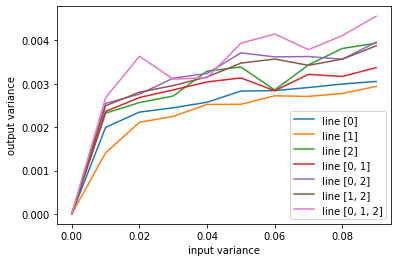

In [4]:
now = datetime.now()
timestamp = datetime.timestamp(now)
#Plot the outcomes
t=0
for arr in plot_matrix:
    plt.plot(percentages, arr, label="line " + str(features[t]))
    t+=1
plt.xlabel('input variance')
plt.ylabel('output variance')
plt.legend()
plt.savefig(path + experiment_name + str(timestamp) + '.png')
plt.show()

In [5]:
# arr0 = [3.448765499004497e-33
# ,0.003946820880503859
# ,0.003774173998413708
# ,0.003191643254171897
# ,0.005552405865416354
# ,0.007705698335299345
# ,0.009512216767408875
# ,0.010423511714084961
# ,0.010934739623538844
# ,0.008878933871099778
# ,0.009654284474979345
# ,0.010792055159790159
# ,0.009438683180892134
# ,0.01050690691365532
# ,0.009572373029161935
# ,0.007899557659117134
# ,0.007732076017587471
# ,0.008161550024433724
# ,0.0088364522251074
# ,0.007795074366919591
# ,0.00688416807724981
# ,0.007403881623398677
# ,0.009052899822701313
# ,0.007243132054735038
# ,0.007281112216303447]
# arr1 = [3.448765499004497e-33
# ,0.004845418782826273
# ,0.004452133856982433
# ,0.004779639539294507
# ,0.003260236965152158
# ,0.0029548597301052716
# ,0.0029679526319253725
# ,0.0048196914577679556
# ,0.002822235171031396
# ,0.0032668883016238252
# ,0.0046128044141789904
# ,0.0032138923335876474
# ,0.005370849993788123
# ,0.00721770474681338
# ,0.004802173484244057
# ,0.005291265399615923
# ,0.0060034320182877875
# ,0.006787385749685153
# ,0.006761312985236075
# ,0.008633328602252107
# ,0.007639241115080397
# ,0.008147544430602413
# ,0.00853294947138105
# ,0.01013415990841017
# ,0.008527055332987839]
# arr2 = [3.448765499004497e-33
# ,0.004176995700465912
# ,0.004695981783091875
# ,0.005461416717172291
# ,0.005789004567771333
# ,0.005525762507926697
# ,0.004913572677165776
# ,0.003624368536131832
# ,0.004697802659359365
# ,0.002981651813823415
# ,0.005653805060527474
# ,0.004393637435056201
# ,0.003885869158993785
# ,0.005424392232191003
# ,0.005862837324159733
# ,0.006828355031194497
# ,0.005220438654776955
# ,0.00501294291581729
# ,0.008312572250425997
# ,0.004482780336577088
# ,0.005796442858238413
# ,0.0066578973195372485
# ,0.006214140087420167
# ,0.006245173786360889
# ,0.008209345068736272]
# arr01 = [3.448765499004497e-33
# ,0.0032918395379207955
# ,0.004244546652084025
# ,0.007619927627377402
# ,0.008327507308344922
# ,0.009249951832026575
# ,0.010410111590433263
# ,0.011123333958857484
# ,0.009862843907593361
# ,0.01209443715409351
# ,0.011584251256844726
# ,0.011224446362332312
# ,0.010286149461874105
# ,0.009489575472168823
# ,0.010104360771172568
# ,0.010158668458234826
# ,0.009443387141522142
# ,0.008812543102029063
# ,0.00883320375379877
# ,0.008435428193606853
# ,0.008487556079608615
# ,0.008623271104336432
# ,0.007931027197228654
# ,0.007630339575433619
# ,0.009215596880937432]
# arr02 = [3.448765499004497e-33
# ,0.004415954614530571
# ,0.004393183579098923
# ,0.007253782044857373
# ,0.007105576069598684
# ,0.010606221585890706
# ,0.010187595308353774
# ,0.010916224971815144
# ,0.011877955413212498
# ,0.011559658817304683
# ,0.012276801875534139
# ,0.011768662846134642
# ,0.011134108184772987
# ,0.011263937287903411
# ,0.009575099051150029
# ,0.010779941971520983
# ,0.009401837019565689
# ,0.009058988848767638
# ,0.008654345655882148
# ,0.008810748036033067
# ,0.008156550883795372
# ,0.008344961457541622
# ,0.007679037970178123
# ,0.0072613277633829095
# ,0.008127200370218938
# ]
# arr12 = [3.448765499004497e-33
# ,0.004203715817745659
# ,0.0058112960725385495
# ,0.005089765477980282
# ,0.0053774272954516715
# ,0.004794453248711361
# ,0.003870067355777759
# ,0.003863749580676183
# ,0.004140281851709713
# ,0.0037222584038422123
# ,0.0026635413489215437
# ,0.007222996113058428
# ,0.005481353033477955
# ,0.004601511424559264
# ,0.004720672152151881
# ,0.005832853592506304
# ,0.006967286928858942
# ,0.0052709103072875385
# ,0.0066455796511948675
# ,0.007919830870727177
# ,0.0057202471755093895
# ,0.0068470458935516385
# ,0.007348500274131704
# ,0.007055859315301166
# ,0.008625376929634339]
# arr012 = [3.448765499004497e-33
# ,0.0037675696076675787
# ,0.0061138563350292205
# ,0.00473325803134199
# ,0.006393841628713211
# ,0.007969281485032492
# ,0.007712776316974071
# ,0.008938940179655719
# ,0.008266482209173672
# ,0.007911953490150414
# ,0.010715310425344423
# ,0.01127565558069883
# ,0.009891767218103809
# ,0.009873848823804843
# ,0.009031630187909576
# ,0.008995942476700212
# ,0.01013050456080347
# ,0.010168434949926473
# ,0.009943909700947866
# ,0.009282197695268866
# ,0.009628966784244936
# ,0.00813828543067358
# ,0.009016409570059255
# ,0.0078088590676510805
# ,0.007332446223240646]
# input_variances = np.arange(0,0.25,0.01)
# plt.plot(input_variances, arr0, label="line [0]")
# plt.plot(input_variances, arr1, label="line [1]")
# plt.plot(input_variances, arr2, label="line [2]")
# plt.plot(input_variances, arr01, label="line [0, 1]")
# plt.plot(input_variances, arr02, label="line [0, 2]")
# plt.plot(input_variances, arr12, label="line [0, 2]")
# plt.plot(input_variances, arr012, label="line [0, 1, 2]")
# plt.xlabel('input variance')
# plt.ylabel('output variance')
# plt.legend()
# plt.savefig('community dec tree experiment'+ str(timestamp) + '.png')
# plt.show()
# 

